<h1 style="font-family:verdana;"> <center>🏦Bank🏦 Churn Prediction Dataset Using 🦥Classifier Logistics Regression :</center> </h1>

# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Required Libraries](#section2)
* [3. Data Exploration](#section3)
  - [Feature Description](#section31)
  - [Null Value Distribution](#section32)
  - [Data Cleaning](#section33)
  - [Important Observations](#section34)
* [4.Data Visualization](#section4)
   - [Content Analysis with help of Target Variable](#section41)
   - [HeatMap](#section42)
   - [Important Observations](#section43)
* [5. Data preprocessing and feature engineering](#4)
    - [5.1 Min-Max Scaling or Standardization?](#4.1)
    - [5.2 Encoding Categorical Variables](#4.2)
        - [5.2.1 Label Encoding](#4.2.1)
        - [5.2.2 One hot Encoding](#4.2.2)
        - [5.2.3 Multicolinearity](#4.2.3)
* [6. Data Splitting and Model Building](#section5)
   - [6.1 Data Splitting Or Cross Validation](#section51)
   - [6.2 Model Buiding and Model Evaluation](#section52)
  

<a id="section1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Introduction</div>
            
![Bank](https://images.pexels.com/photos/351264/pexels-photo-351264.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500)
<p style="font-size:15px; font-family:verdana; line-height: 1.7em"> We are given the dataset about bank information of around 10000 customers and also given if they have churned or not. Our task is to build a ML model such that we can predict if a customer is going to churn or not. We will also perform EDA on this dataset to inform the bank on what they could do to minimise the churn and build a sustainable business.</p>

<a id="section2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
#Importing all essential libraries
import numpy as np , pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<a id="section3"></a>
##  Data Exploration :

<a id="section31"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Feature Description:</h3>

<ol>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Customer ID</code> - Unique ID given to identify a particular customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Score</code> - It is the score which determines the creditworthiness of a customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Country</code> - The country where customer lives.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Gender</code> - The Sex of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Age</code> - The age of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Tenure</code> - Number of years the customer has Bank Account in that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Balance</code> - Amount of money present in customer's bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Products Number</code> - Number of Products from that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Card</code> - Does the customer own a credit card of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Active Member</code> - Whether the customer is an active member of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Estimated Salary</code> - Total Income of the Customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Churn</code> - Churn (Loss of existing customers) of the Bank.</li>
</ol>
</div>

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.drop(columns='customer_id', inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['tenure'].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413],
      dtype=int64)

In [7]:
np.arange(1, 3, 1)

array([1, 2])

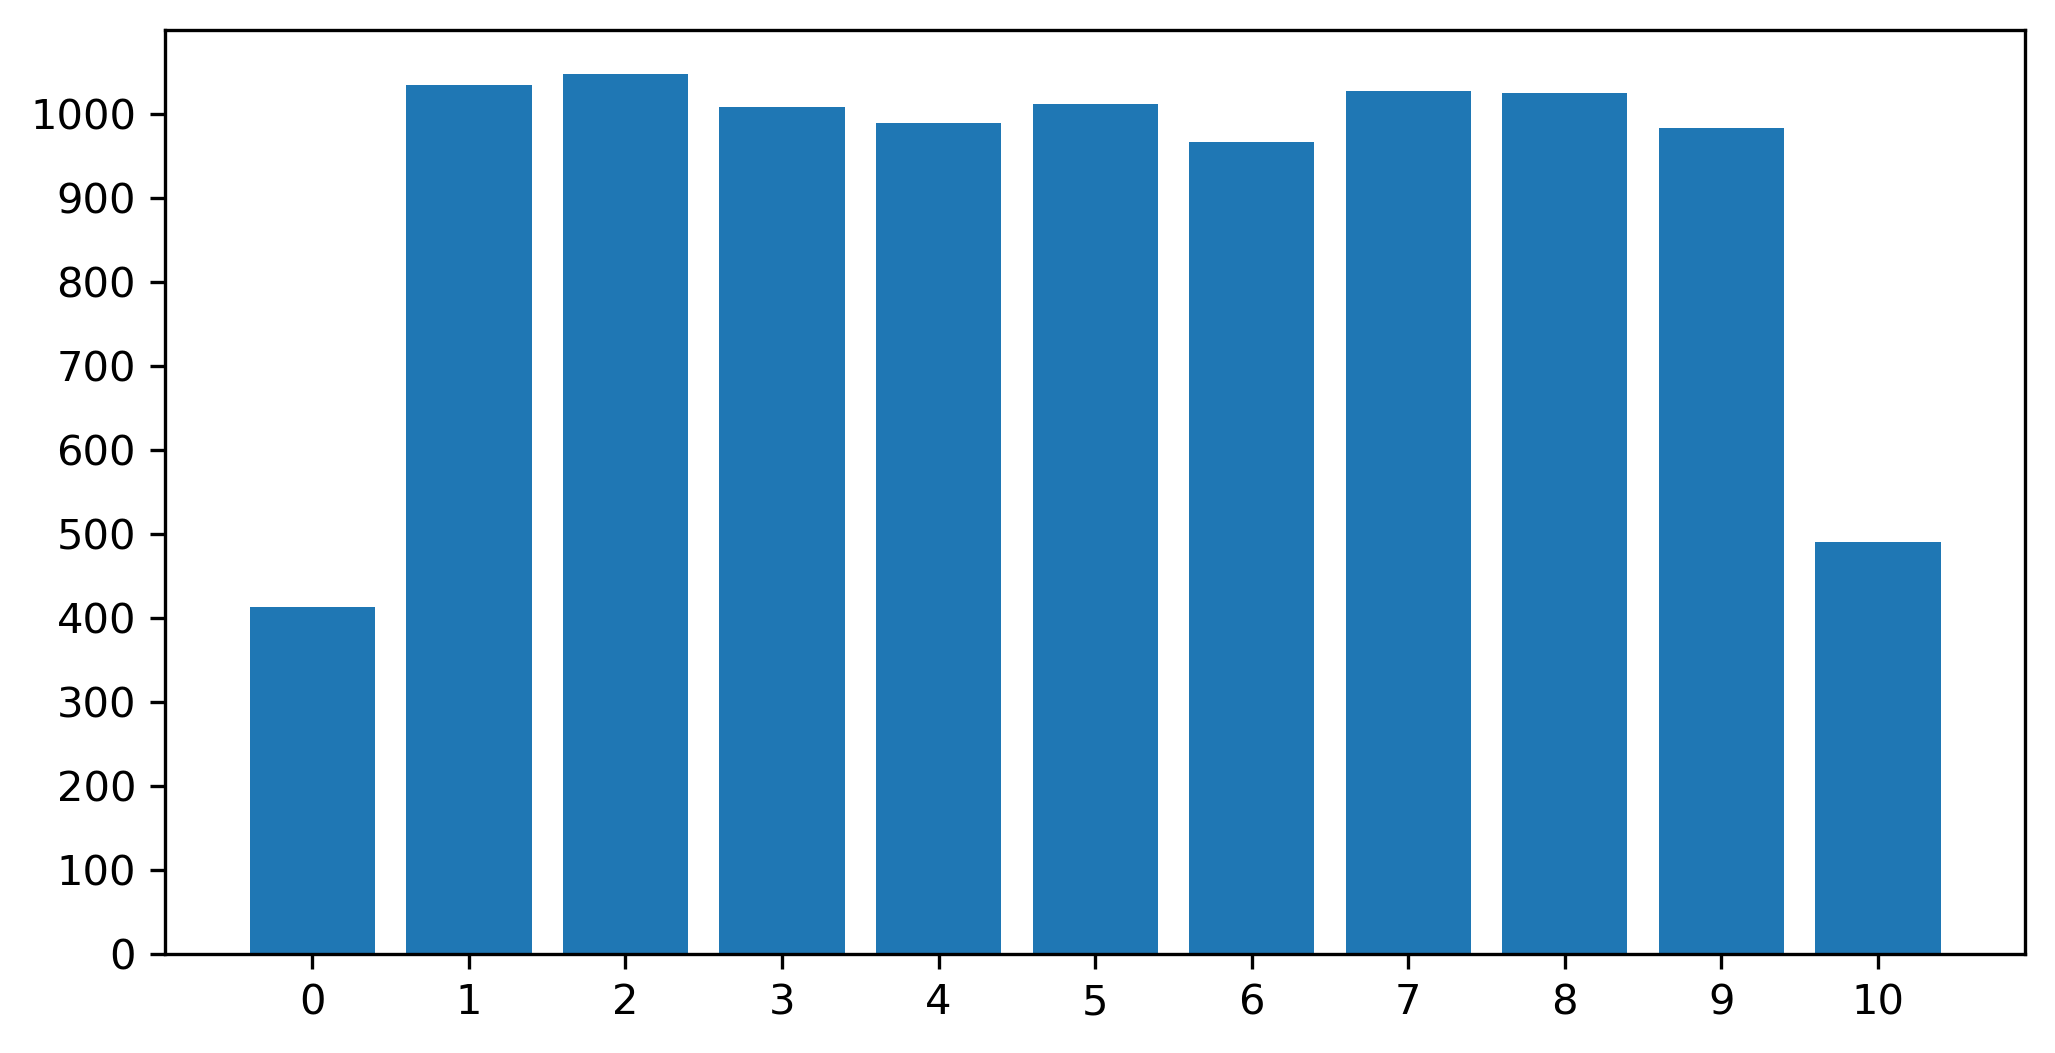

In [8]:
plt.figure(figsize=(8, 4), dpi = 300)
plt.bar(x = df['tenure'].value_counts().index, height=df['tenure'].value_counts().values)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 1100, 100))
plt.savefig('bargraph')
plt.show()

In [9]:
df_tenure_2 = df[df['tenure']==2]

In [10]:
df_tenure_2.shape

(1048, 11)

In [11]:
df_tenure_2[df_tenure_2['churn']==1]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
43,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
81,777,France,Female,32,2,0.00,1,1,0,136458.19,1
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
...,...,...,...,...,...,...,...,...,...,...,...
9466,559,France,Male,52,2,0.00,1,1,0,129013.59,1
9584,563,Germany,Male,41,2,100520.92,1,1,1,19412.80,1
9635,547,France,Female,49,2,0.00,1,0,0,65466.93,1
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1


In [12]:
df[(df['tenure']==2) & (df['churn']==1)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
43,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
81,777,France,Female,32,2,0.00,1,1,0,136458.19,1
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
...,...,...,...,...,...,...,...,...,...,...,...
9466,559,France,Male,52,2,0.00,1,1,0,129013.59,1
9584,563,Germany,Male,41,2,100520.92,1,1,1,19412.80,1
9635,547,France,Female,49,2,0.00,1,0,0,65466.93,1
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1


In [13]:
df[(df['tenure']==10) & (df['churn']==1)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
172,480,Germany,Male,44,10,129608.57,1,1,0,5472.70,1
223,850,France,Male,33,10,0.00,1,1,0,4861.72,1
245,635,France,Female,40,10,123497.58,1,1,0,131953.23,1
339,716,Germany,Female,39,10,115301.31,1,1,0,43527.40,1
376,745,Germany,Male,45,10,117231.63,3,1,1,122381.02,1
...,...,...,...,...,...,...,...,...,...,...,...
9690,846,France,Female,34,10,142388.61,2,0,1,68393.64,1
9693,617,Germany,Female,51,10,167273.71,1,0,0,93439.75,1
9825,467,Germany,Male,28,10,126315.26,1,1,0,32349.29,1
9934,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1


In [14]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df['country'].nunique()

3

In [18]:
df.shape

(10000, 11)

In [19]:
len(df)

10000

In [20]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [22]:
# df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
# .bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

In [23]:
# df.nunique()

<a id="section32"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Null Value Distribution:</h3>

In [24]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<a id="section33"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Data Cleaning:</h3>
    <p style = "font-family:verdana;">We do not have any missing value in the dataset hence now we can analyse the data much better and build accurate models for prediction. If the dataset would contain missing values, check the below given links to help you know the process of Data cleaning :</p>
        <ol>
    <li><a href="https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/">Geek for Geeks</a></li>
    </ol>
        

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Important Observations :</h3>
    <div class="alert alert-block alert-info">
* <i> There are total of <code>12</code> columns and <code>10000</code> rows in data.</i><br>
* <i> We drop <code>Customer ID</code> feature as it is of no use.</i><br>
* <i> <code>Churn</code> is the Target Variable.</i><br>
* <i> The data is of people from 3 countries, which are <code>France</code>,<code>Germany</code> and <code>Spain</code>.</i><br>
    </div>
    </div>

<a id="section4"></a>
# Data Visualization :

<a id="section41"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Content Analysis with help of Target Variable :</h3>

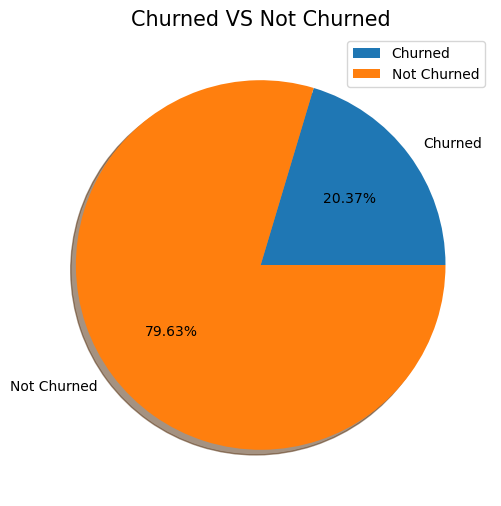

In [25]:
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

<a id="section42"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">HeatMap Analysis:</h3>


In [26]:
df_corr = df[['credit_score', 'age', 'balance','estimated_salary' ]].corr()

In [27]:
df_corr['balance']

credit_score        0.006268
age                 0.028308
balance             1.000000
estimated_salary    0.012797
Name: balance, dtype: float64

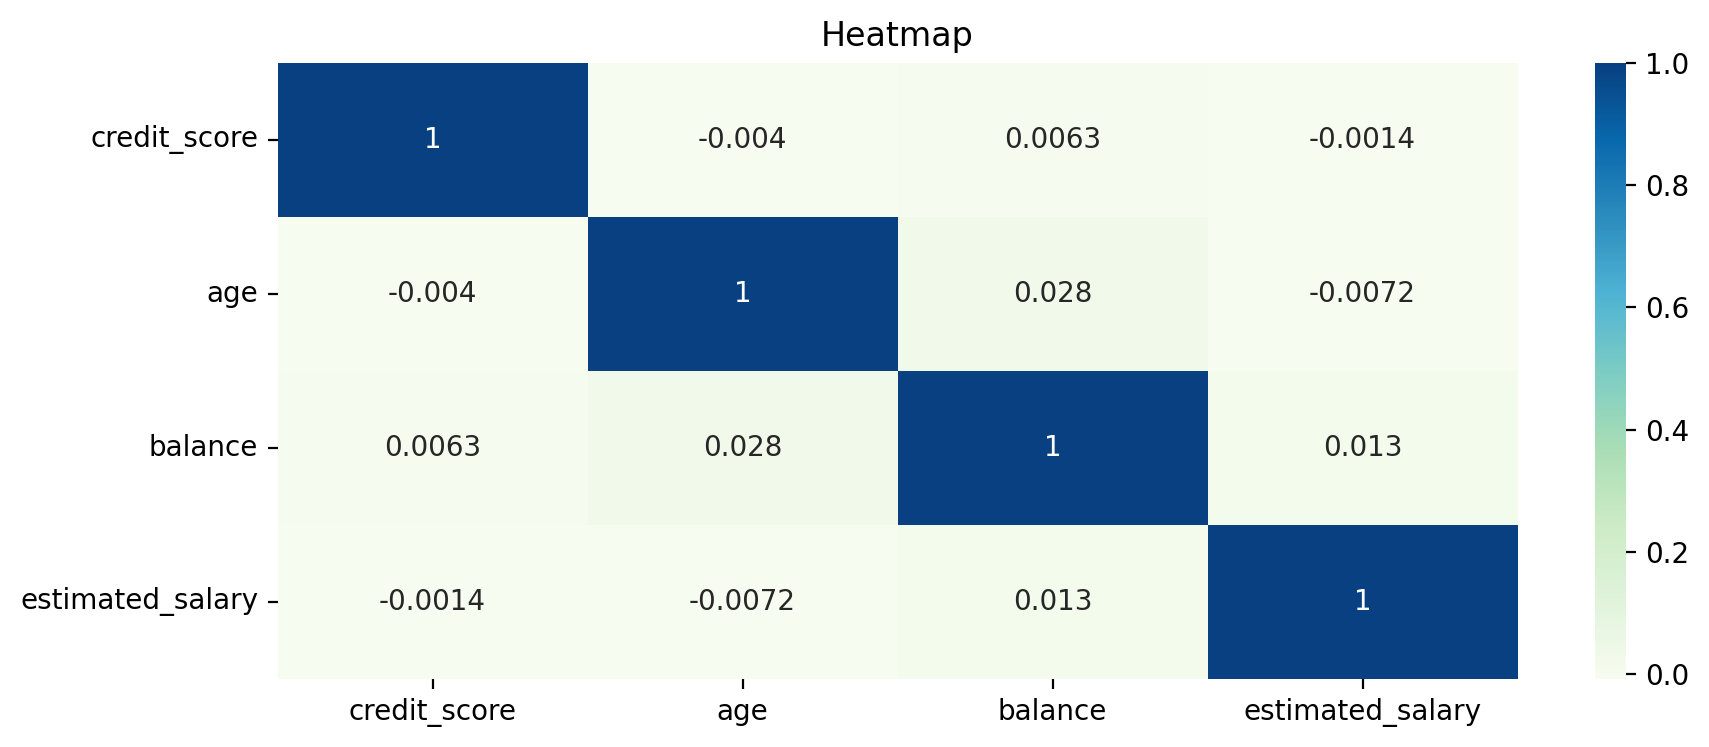

In [28]:
fig, ax =plt.subplots(figsize = (10, 4), dpi = 200)
sns.heatmap(data=df[['credit_score', 'age', 'balance','estimated_salary' ]].corr(), annot=True,cmap = "GnBu")
plt.title('Heatmap')
plt.savefig('Heatmap')
plt.show()

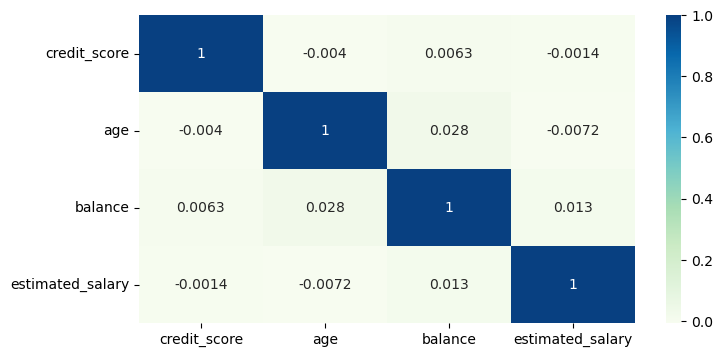

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(data=df[['credit_score', 'age', 'balance','estimated_salary' ]].corr(), annot=True,cmap = "GnBu")
plt.show()


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span>Data preprocessing and feature engineering</div>


<a id="4.1"></a>
# <b>5.1 <span style='color:#00008B'> Feature Scaling</span></b>
**feature scaling** is not required for logistic regression


In [31]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="4.2"></a>
# <b>5.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


In [32]:
df.replace('Male',1,inplace=True)
df.replace('Female',0,inplace=True)

In [33]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


<a id="4.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Label Encoding or two Hot encoding</span></b>

In [ ]:
df.columns

<a id="4.2.2"></a>
## <b>5.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [36]:
df = pd.get_dummies(df, columns=['country'])


In [39]:
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,True,False


In [38]:
df['country_France'] = df['country_France'].astype(int)

In [40]:
df['country_Germany'] = df['country_Germany'].astype(int)

In [41]:
df['country_Spain'] = df['country_Spain'].astype(int)

<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>Multicollinearity</span></b>

In [43]:
# df.corr()

<a id="section5"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>6.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


In [47]:
y = df['churn']
x = df.drop('churn', axis = 1)
x.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain'],
      dtype='object')

In [51]:
a, b = df.shape

In [53]:
b

13

In [52]:
a 

10000

In [49]:
 train_test_split(x, y, test_size=0.2,random_state=0)

[      credit_score  gender  age  tenure    balance  products_number  \
 7389           667       0   34       5       0.00                2   
 9275           427       1   42       1   75681.52                1   
 2995           535       0   29       2  112367.34                1   
 5316           654       1   40       5  105683.63                1   
 356            850       0   57       8  126776.30                2   
 ...            ...     ...  ...     ...        ...              ...   
 9225           594       0   32       4  120074.97                2   
 4859           794       0   22       4  114440.24                1   
 3264           738       1   35       5  161274.05                2   
 9845           590       0   38       9       0.00                2   
 2732           623       0   48       1  108076.33                1   
 
       credit_card  active_member  estimated_salary  country_France  \
 7389            1              0         163830.64            

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [59]:
df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [61]:
X_train[['country_France', 'country_Germany', 'country_Spain']]

,country_France,country_Germany,country_Spain
7389,0,0,1
9275,0,1,0
2995,1,0,0
5316,0,0,1
356,0,0,1
...,...,...,...
9225,0,1,0
4859,0,0,1
3264,1,0,0
9845,0,0,1


In [58]:
X_train['age']

7389    34
9275    42
2995    29
5316    40
356     57
        ..
9225    32
4859    22
3264    35
9845    38
2732    48
Name: age, Length: 8000, dtype: int64

In [57]:
X_train['gender']

7389    0
9275    1
2995    0
5316    1
356     0
       ..
9225    0
4859    0
3264    1
9845    0
2732    0
Name: gender, Length: 8000, dtype: int64

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding and Model Evaluation</span></b>

**LogisticRegression**
<img src="Photos/Logistics.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">
<img src="Photos/Sigmoid_function.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [64]:
X_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
7389,667,0,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,1,42,1,75681.52,1,1,1,57098.00,0,1,0
2995,535,0,29,2,112367.34,1,1,0,185630.76,1,0,0
5316,654,1,40,5,105683.63,1,1,0,173617.09,0,0,1
356,850,0,57,8,126776.30,2,1,1,132298.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,594,0,32,4,120074.97,2,1,1,162961.79,0,1,0
4859,794,0,22,4,114440.24,1,1,1,107753.07,0,0,1
3264,738,1,35,5,161274.05,2,1,0,181429.87,1,0,0
9845,590,0,38,9,0.00,2,1,1,148750.16,0,0,1


In [62]:
model_Logistic = LogisticRegression()

In [63]:
model_Logistic.fit(X_train, y_train)

LogisticRegression()

In [66]:
model_Logistic.coef_

array([[-5.00793141e-03, -1.04543927e-03,  4.39218123e-02,
        -2.27067762e-03,  3.56539970e-06, -4.92503022e-04,
        -2.21523600e-04, -1.38033076e-03, -1.43640821e-06,
        -8.92357264e-04,  9.70050467e-04, -2.68326981e-04]])

In [70]:
X_train.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_France',
       'country_Germany', 'country_Spain'],
      dtype='object')

In [68]:
model_Logistic.intercept_

array([-0.00019063])

In [72]:
coefficients = model_Logistic.coef_
feature_names = X_train.columns

In [74]:
coefficients_list = coefficients[0].tolist()  # Convert NumPy array to a list
feature_names_list = feature_names.tolist()
coe_with_feature = pd.DataFrame({'coefficients':coefficients_list, 
                           'feature Name':feature_names_list
                          }) 
coe_with_feature

,coefficients,feature Name
0,-0.005008,credit_score
1,-0.001045,gender
2,0.043922,age
3,-0.002271,tenure
4,0.000004,balance
5,-0.000493,products_number
6,-0.000222,credit_card
7,-0.001380,active_member
8,-0.000001,estimated_salary
9,-0.000892,country_France


In [83]:
coe_with_feature = coe_with_feature.sort_values(by = 'coefficients', ascending=False)

In [101]:
# coe_with_feature.sort_values(by = 'coefficients', ascending=False)

In [85]:
coe_with_feature['coefficients']

2     0.043922
10    0.000970
4     0.000004
8    -0.000001
6    -0.000222
11   -0.000268
5    -0.000493
9    -0.000892
1    -0.001045
7    -0.001380
3    -0.002271
0    -0.005008
Name: coefficients, dtype: float64

In [86]:
coe_with_feature['feature Name']

2                  age
10     country_Germany
4              balance
8     estimated_salary
6          credit_card
11       country_Spain
5      products_number
9       country_France
1               gender
7        active_member
3               tenure
0         credit_score
Name: feature Name, dtype: object

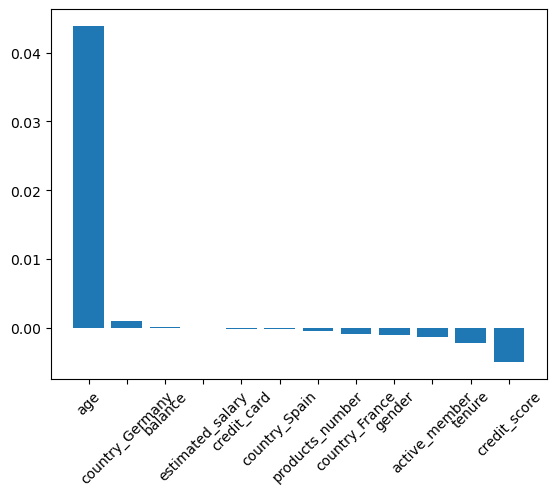

In [91]:
plt.bar(x= coe_with_feature['feature Name'], height=coe_with_feature['coefficients'])
plt.xticks( rotation = 45)
plt.show()

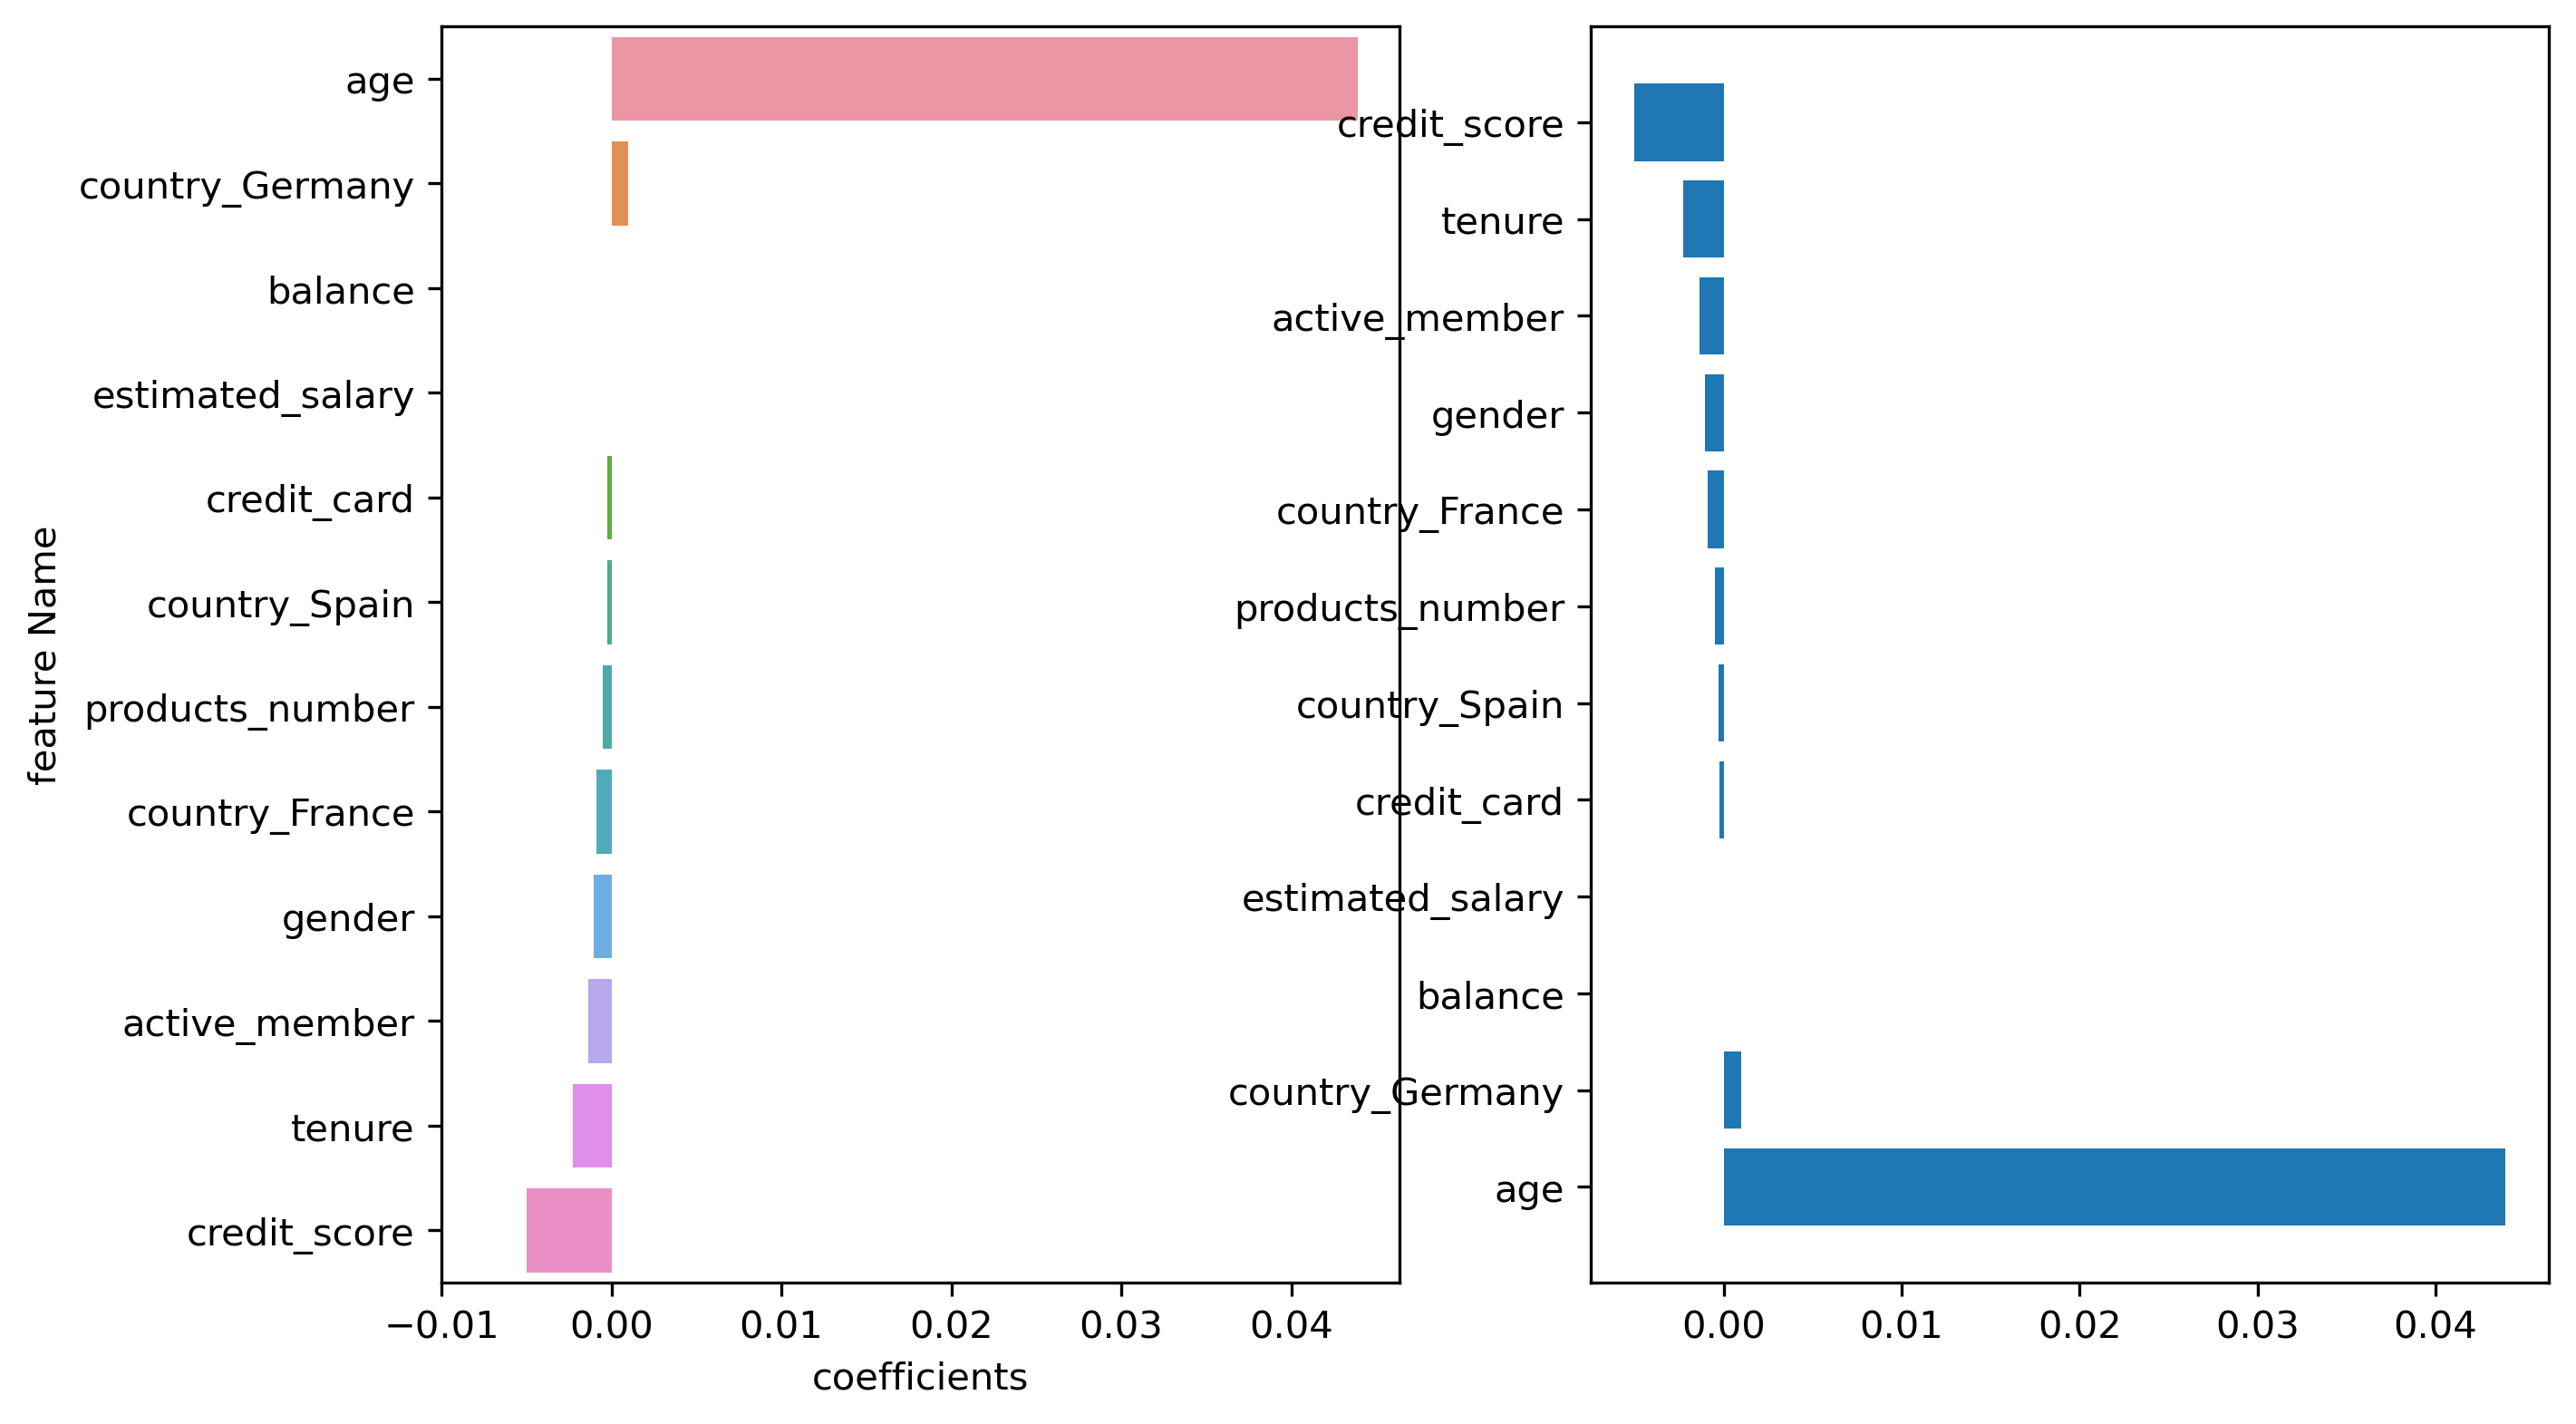

In [117]:
fig, ax =plt.subplots(1, 2, figsize = (10, 6), dpi = 300)
sns.barplot(x =coe_with_feature['coefficients'], y = coe_with_feature['feature Name'], ax=ax[0] )
ax[1].barh(y= coe_with_feature['feature Name'], width=coe_with_feature['coefficients'])
ax[0].set_xticks(np.arange(-0.01, 0.05, 0.01))
# plt.show()

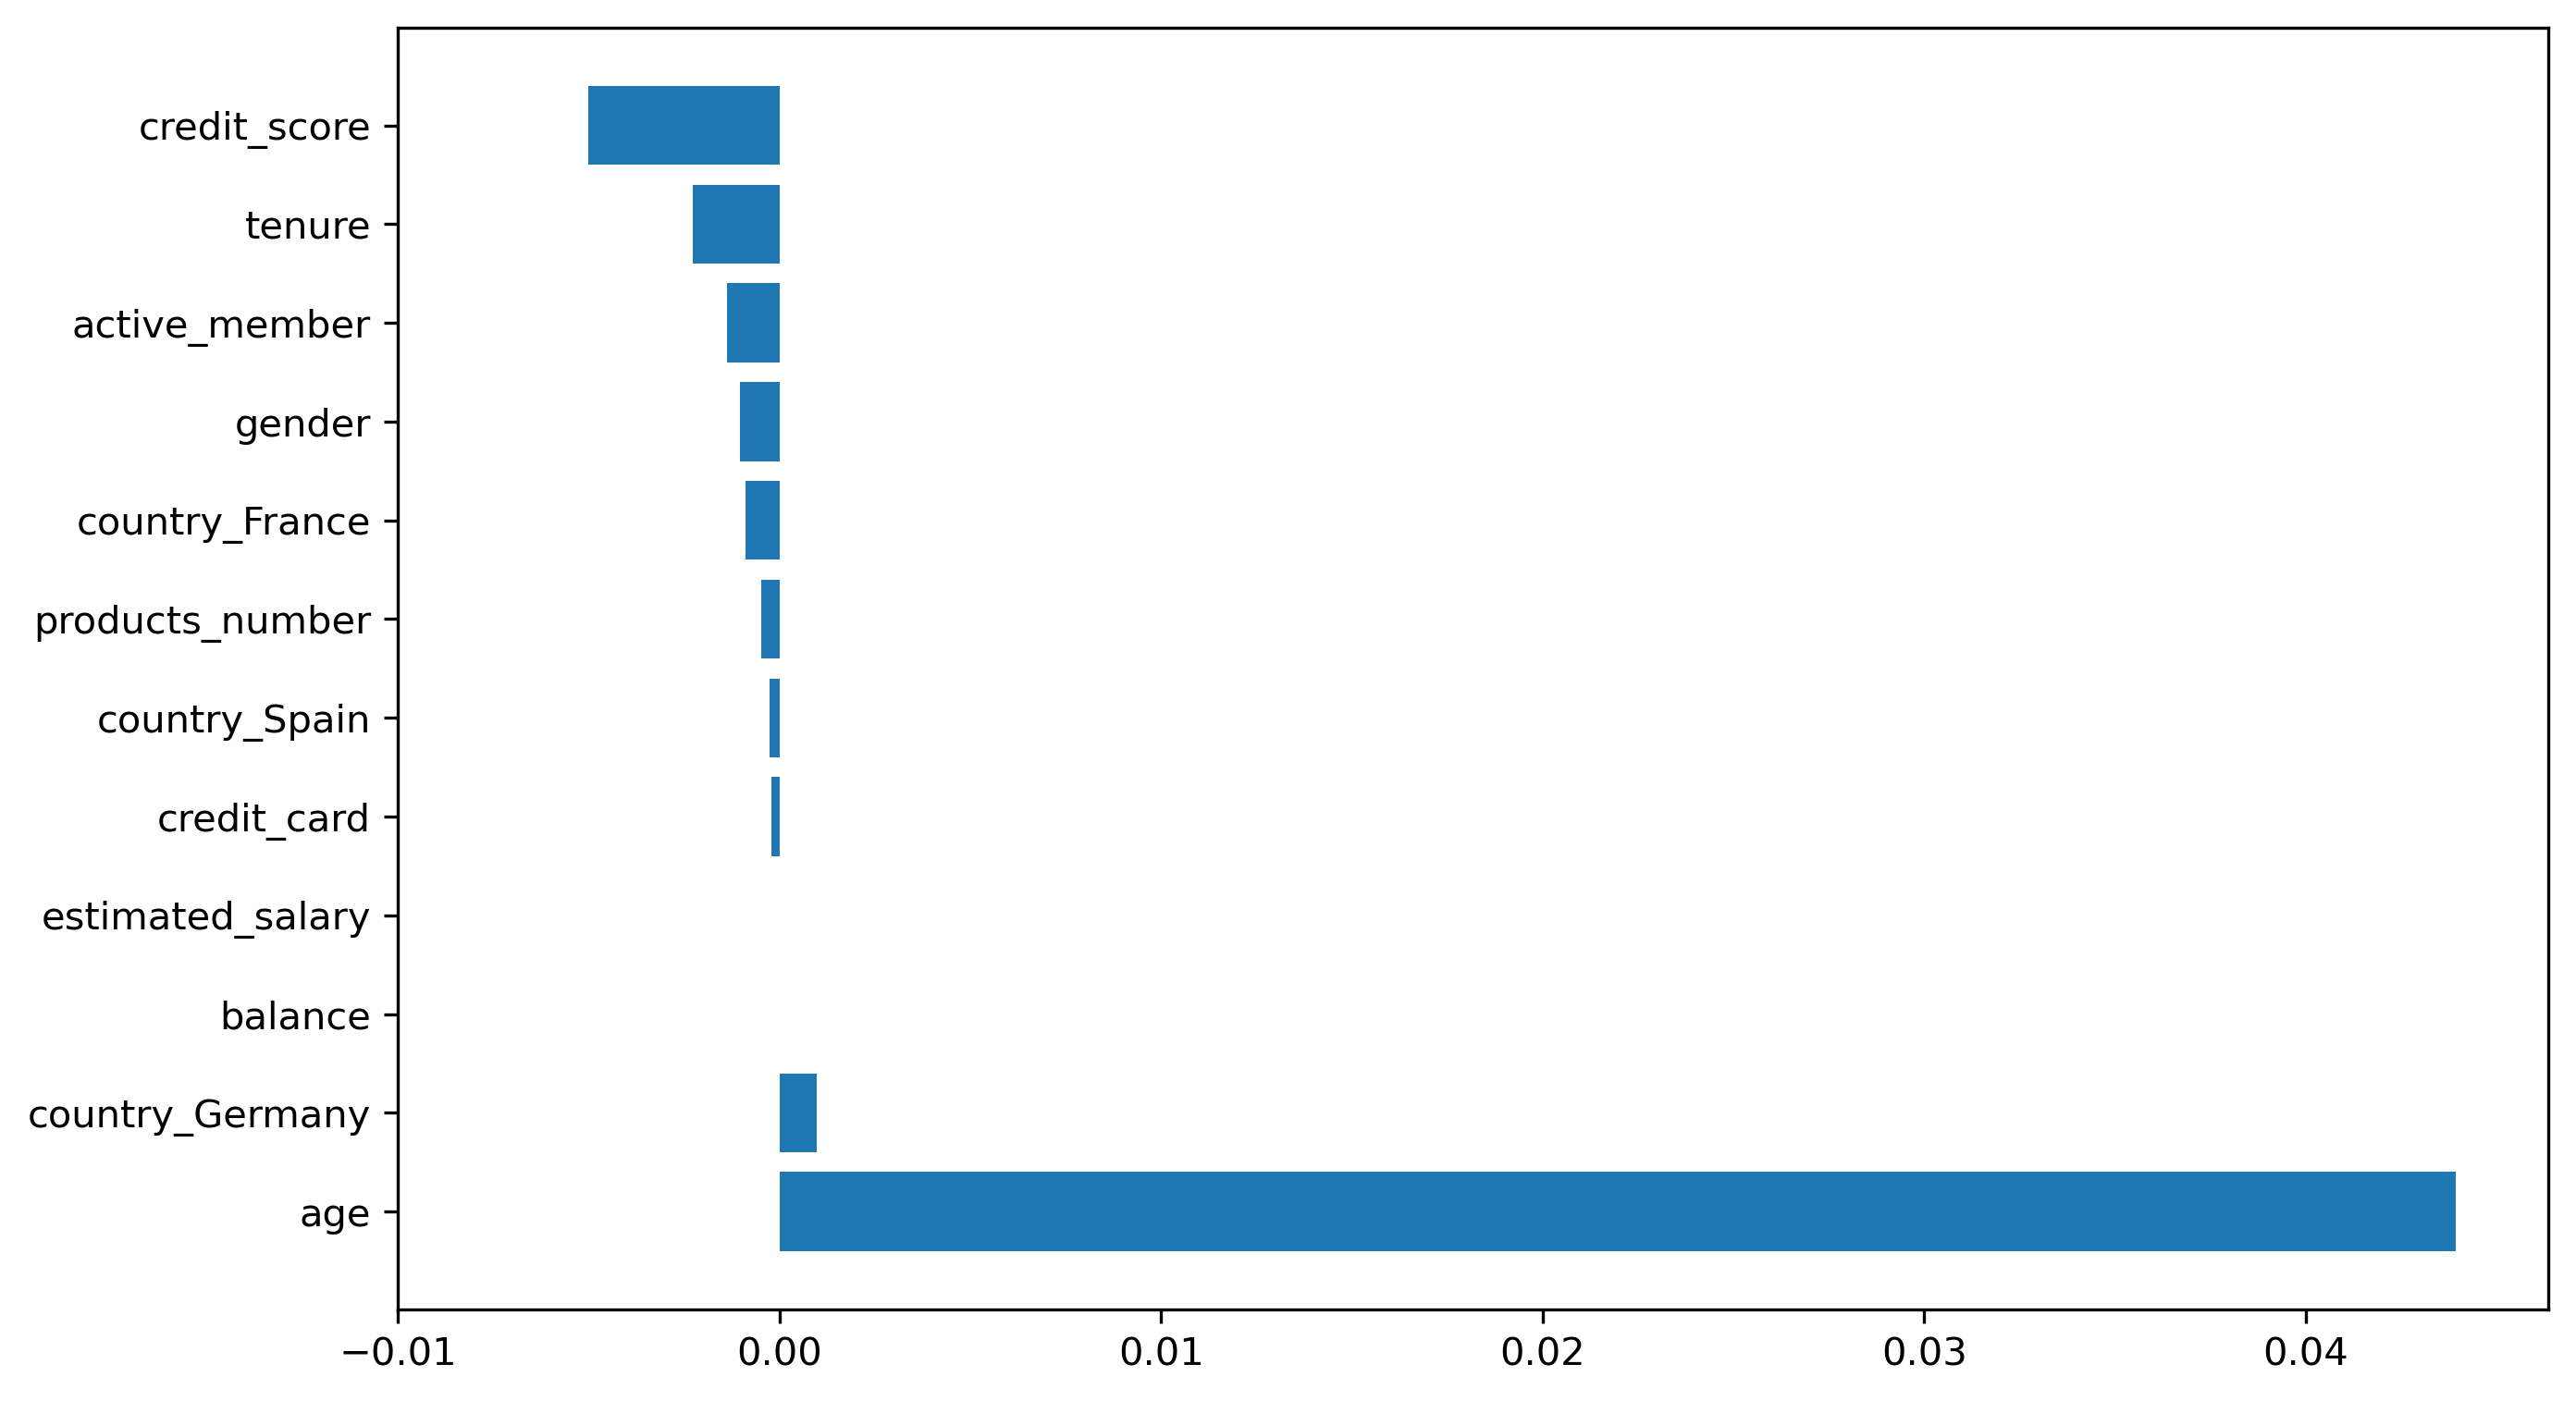

In [109]:
fig, ax =plt.subplots(figsize = (10, 6), dpi = 300)
ax.barh(y= coe_with_feature['feature Name'], width=coe_with_feature['coefficients'])
ax.set_xticks(np.arange(-0.01, 0.05, 0.01))
plt.show()

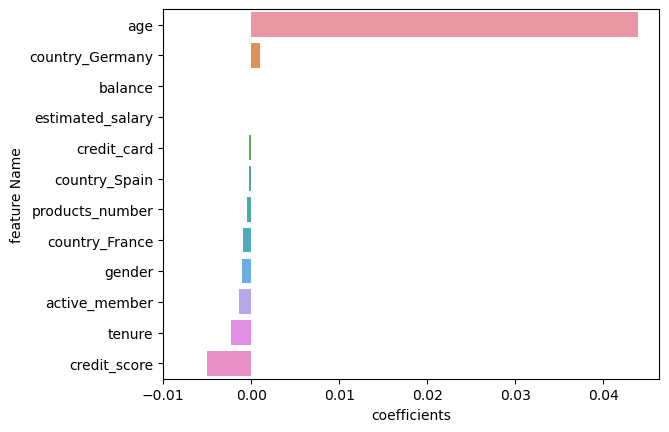

In [104]:
sns.barplot(x =coe_with_feature['coefficients'], y = coe_with_feature['feature Name'] )
plt.xticks(np.arange(-0.01, 0.05, 0.01))
plt.show()

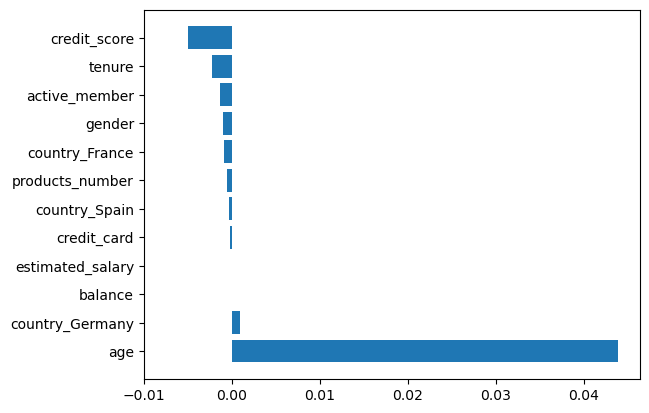

In [99]:
plt.barh(y= coe_with_feature['feature Name'], width=coe_with_feature['coefficients'])
plt.xticks(np.arange(-0.01, 0.05, 0.01))
plt.show()

In [79]:
y_pred = model_Logistic.predict(X_test)

In [118]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: churn, Length: 2000, dtype: int64

In [82]:
confusion_matrix(y_test, y_pred)

array([[1553,   42],
       [ 380,   25]], dtype=int64)

In [121]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

In [124]:
X_test

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
9394,597,0,35,8,131101.04,1,1,1,192852.67,0,1,0
898,523,0,40,2,102967.41,1,1,0,128702.10,1,0,0
2398,706,0,42,8,95386.82,1,1,1,75732.25,0,0,1
5906,788,1,32,4,112079.58,1,0,0,89368.59,1,0,0
2343,706,1,38,5,163034.82,2,1,1,135662.17,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1037,625,0,24,1,0.00,2,1,1,180969.55,1,0,0
2899,586,0,35,7,0.00,2,1,0,70760.69,1,0,0
9549,578,1,36,1,157267.95,2,1,0,141533.19,0,0,1
2740,650,1,34,4,142393.11,1,1,1,11276.48,0,1,0


In [123]:
y_test


9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: churn, Length: 2000, dtype: int64

In [126]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: churn, Length: 8000, dtype: int64

In [125]:
X_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
7389,667,0,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,1,42,1,75681.52,1,1,1,57098.00,0,1,0
2995,535,0,29,2,112367.34,1,1,0,185630.76,1,0,0
5316,654,1,40,5,105683.63,1,1,0,173617.09,0,0,1
356,850,0,57,8,126776.30,2,1,1,132298.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9225,594,0,32,4,120074.97,2,1,1,162961.79,0,1,0
4859,794,0,22,4,114440.24,1,1,1,107753.07,0,0,1
3264,738,1,35,5,161274.05,2,1,0,181429.87,1,0,0
9845,590,0,38,9,0.00,2,1,1,148750.16,0,0,1


In [122]:
model_eval(y_test, y_pred)

{'Accuracy': 0.789,
 'Error': 0.21099999999999997,
 'Precision': 0.373134328358209,
 'Recall': 0.06172839506172839,
 'Specificity': 0.9736677115987461}

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [ ]:
y_pred

In [ ]:
y_pred = model.predict(X_test)
model_eval(y_test,y_pred )

In [ ]:
df_churn_no =df[df['churn']==0]

In [ ]:
df_churn_no = df_churn_no.sample(n=2037)

In [ ]:
df_churn_yes = df[df['churn']==1]

In [ ]:
df1 = pd.concat([df_churn_no,df_churn_yes],axis=0)

In [ ]:
df1

In [ ]:
x = df1.drop(columns='churn')

In [ ]:
y = df1['churn']

In [ ]:
x_train, x_test, y1_train, y1_test = train_test_split(x, y)

In [ ]:
model2 = LogisticRegression()
model2.fit(x_train, y1_train)

In [ ]:
y_pred1 = model2.predict(x_test)

In [ ]:
y1_test.values

In [ ]:
y_pred1

In [ ]:
confusion_matrix(y1_test, y_pred1)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred1).ravel()

In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
error = 1-accuracy
precision=tp/(tp+fp)
recall=tp/(tp+fn)
specificity=tn/(fp+tn)
result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}

In [ ]:
result